In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
customer = pd.read_csv('customers.csv')
order= pd.read_csv('orders.csv')
product= pd.read_csv('products.csv')

In [8]:
customer.head()

,customer_id,customer_name,city,segment
0,C101,Amit Sharma,Mumbai,Consumer
1,C102,Neha Verma,Pune,Corporate
2,C103,Rahul Patil,Nashik,Home Office
3,C104,Priya Singh,Delhi,Consumer
4,C105,Karan Mehta,Bangalore,Corporate


In [9]:
order.head()

,order_id,customer_id,product_id,order_date,quantity
0,O301,C101,P201,2023-01-10,1
1,O302,C102,P203,2023-01-15,2
2,O303,C103,P204,2023-02-05,3
3,O304,C104,P205,2023-02-18,10
4,O305,C105,P202,2023-03-02,1


In [10]:
product.head()

,product_id,product_name,category,price
0,P201,Laptop,Technology,55000
1,P202,Smartphone,Technology,30000
2,P203,Office Chair,Furniture,7000
3,P204,Headphones,Technology,2500
4,P205,Notebook,Stationery,200


In [12]:
# data cleaning
order['order_date']= pd.to_datetime(order['order_date'])

In [14]:
# merge dataframes
DF= order.merge(customer, on='customer_id') \
.merge(product, on='product_id')

In [15]:
# feature presentation
DF['revenue']= DF['quantity']* DF['price']

In [17]:
# analysis
total_revenue= DF['revenue'].sum()
revenue_by_product= DF.groupby('product_name')['revenue'].sum()
segment_revenue= DF.groupby('segment')['revenue'].sum()


In [18]:
#time analysis

DF['month']= DF['order_date'].dt.month
monthly_sales= DF.groupby('month')['revenue'].sum()

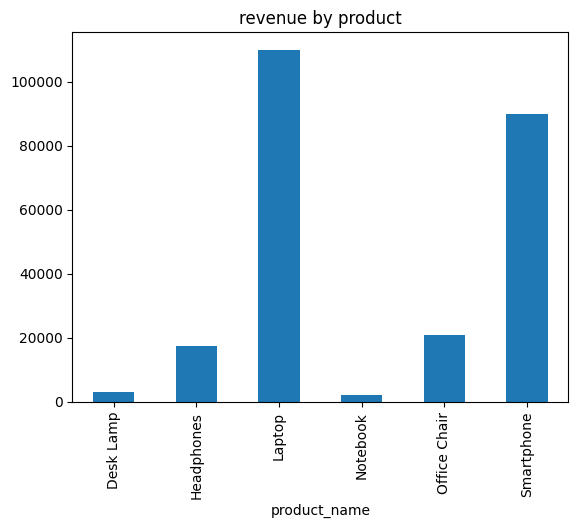

In [19]:
# visualization

revenue_by_product.plot(kind='bar')
plt.title('revenue by product')
plt.show()


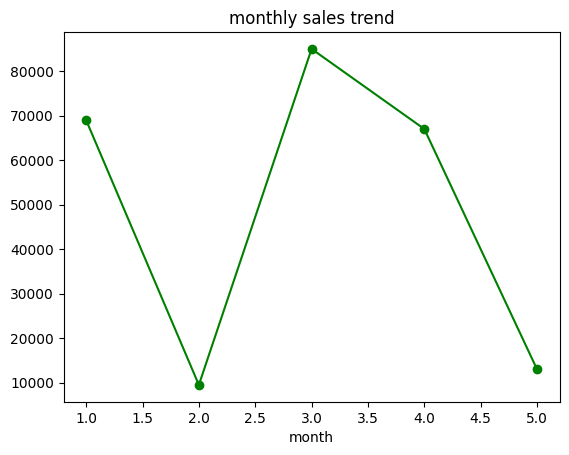

In [26]:
monthly_sales.plot(kind='line',marker='o',color='green')
plt.title('monthly sales trend')
plt.show()

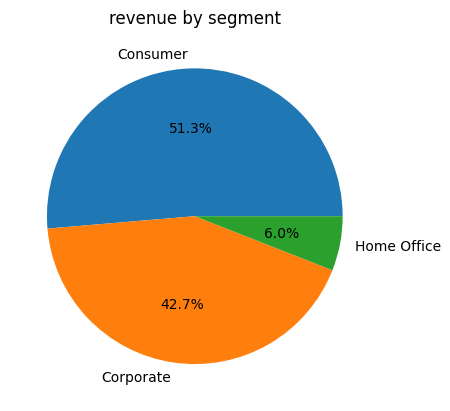

In [29]:
segment_revenue.plot(kind='pie', autopct='%1.1f%%')
plt.title('revenue by segment')
plt.ylabel('')
plt.show()